<a href="https://colab.research.google.com/github/Himakar06/Superstore_Analysis/blob/main/notebooks/Superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Ridge ,Lasso , LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score ,confusion_matrix , classification_report,precision_score,recall_score,f1_score,accuracy_score

In [2]:
from mlxtend.frequent_patterns import apriori , association_rules

In [3]:
#Load Dataset
df = pd.read_csv('Superstore.csv' , encoding = 'latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
#Cleaning data
print(df.isnull().sum())
df.drop(columns='Row ID' , inplace=True)

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.to_period("M").astype('str')

df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Ship Year'] = df['Ship Date'].dt.year
df['Ship Month'] = df['Ship Date'].dt.to_period("M")



In [7]:
df['Shipping Duration'] = df['Ship Date'] - df['Order Date']
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Ship Year,Ship Month,Shipping Duration
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,2016-11,2016,2016-11,3 days
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,2016-11,2016,2016-11,3 days
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,2016-06,2016,2016-06,4 days
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,2015-10,2015,2015-10,7 days
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,2015-10,2015,2015-10,7 days


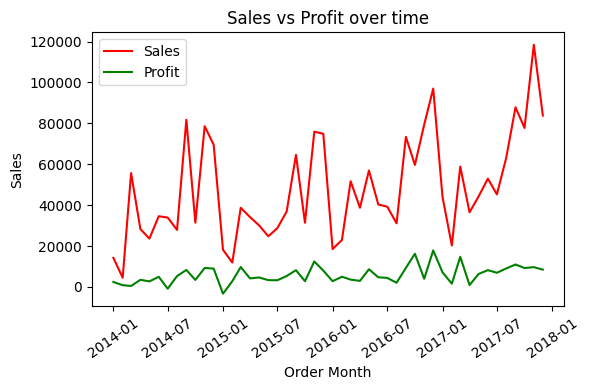

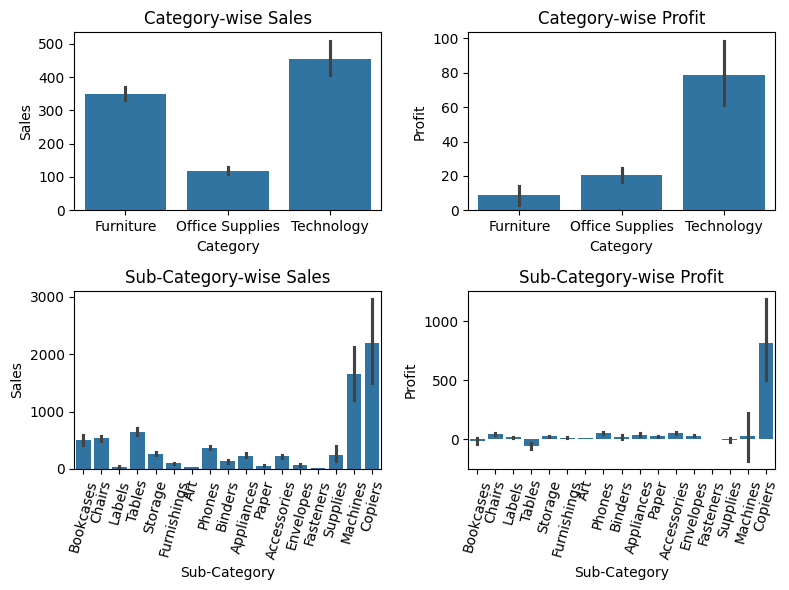

In [8]:
#EDA
#Sales vs Profit over time (line chart)
monthly_sales = df.groupby('Order Month')[['Sales','Profit']].sum().reset_index()
monthly_sales['Order Month'] = pd.to_datetime(monthly_sales['Order Month'])

plt.figure(figsize=(6,4))
sns.lineplot(x='Order Month', y='Sales' ,data=monthly_sales, label = 'Sales',color ='red')
sns.lineplot(x='Order Month', y='Profit' ,data=monthly_sales, label = 'Profit',color ='green')
plt.title("Sales vs Profit over time")
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()


#Category-wise and Sub-Category-wise sales/profit (barplot)

fig,axes = plt.subplots(2,2,figsize=(8,6))

sns.barplot(x='Category',y='Sales',data=df , ax=axes[0,0])
axes[0,0].set_title('Category-wise Sales')

sns.barplot(x='Category',y='Profit',data=df , ax=axes[0,1])
axes[0,1].set_title('Category-wise Profit')

sns.barplot(x='Sub-Category',y='Sales',data=df , ax=axes[1,0])
axes[1,0].set_title('Sub-Category-wise Sales')
axes[1,0].tick_params(axis ='x' , rotation=75)

sns.barplot(x='Sub-Category',y='Profit',data=df , ax=axes[1,1])
axes[1,1].set_title('Sub-Category-wise Profit')
axes[1,1].tick_params(axis ='x' , rotation=75)

plt.tight_layout()
plt.show()

In [9]:
#Top 10 most profitable products
df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

,Profit
Product Name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,7753.0390
Hewlett Packard LaserJet 3310 Copier,6983.8836
Canon PC1060 Personal Laser Copier,4570.9347
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",4094.9766
Ativa V4110MDD Micro-Cut Shredder,3772.9461
"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System,3696.2820
Ibico EPK-21 Electric Binding System,3345.2823


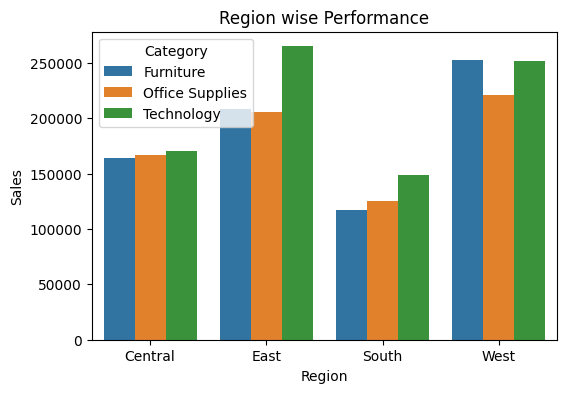

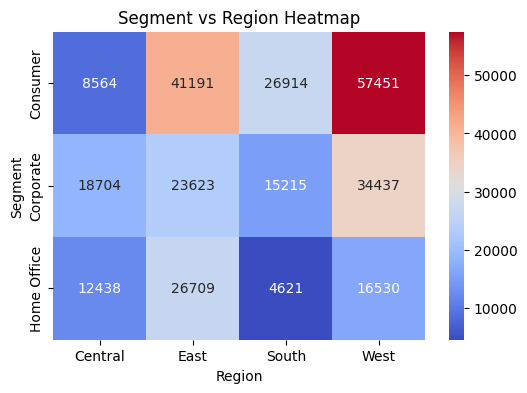

In [10]:
#Region-wise performance (map or grouped barplot)

reg_performance = df.groupby(['Region','Category'])['Sales'].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='Region' , y = 'Sales' , hue = 'Category',data= reg_performance  )
plt.title('Region wise Performance')

#Heatmap: Profit by Segment vs Region
seg_reg = df.groupby(['Segment' , "Region"])['Profit'].sum().reset_index()
seg_reg_table = seg_reg.pivot(index = 'Segment' , columns = 'Region' , values = "Profit")

plt.figure(figsize=(6,4))
sns.heatmap(data= seg_reg_table , annot = True , cmap ="coolwarm" , fmt = '.0f')
plt.title("Segment vs Region Heatmap")
plt.show()

In [11]:
#Which shipping mode is fastest vs most used?
most_used  = df["Ship Mode"].value_counts().rename('most used')
fastest = df.groupby("Ship Mode")['Shipping Duration'].mean().sort_values(ascending=False)
fastest = fastest.dt.days

pd.concat([most_used , fastest.rename("Shipping days")] , axis = 1)

,most used,Shipping days
Ship Mode,,
Standard Class,5968,5
Second Class,1945,3
First Class,1538,2
Same Day,543,0


In [12]:
#Loss-making orders/products (filter + analysis)
loss_products = df[df['Profit']<0]

most_loss_products = loss_products['Product Name'].value_counts().head()
print("5 loss making products\n",most_loss_products)

loss_per_product = loss_products.groupby('Product Name')['Profit'].sum().sort_values().head()
print("\nLoss per product:\n",loss_per_product)

5 loss making products
 Product Name
Global Wood Trimmed Manager's Task Chair, Khaki    12
KI Adjustable-Height Table                         10
Global High-Back Leather Tilter, Burgundy          10
Hon 61000 Series Interactive Training Tables        9
Premier Elliptical Ring Binder, Black               8
Name: count, dtype: int64

Loss per product:
 Product Name
Cubify CubeX 3D Printer Double Head Print          -9239.9692
GBC DocuBind P400 Electric Binding System          -6859.3896
Lexmark MX611dhe Monochrome Laser Printer          -5269.9690
GBC Ibimaster 500 Manual ProClick Binding System   -5098.5660
GBC DocuBind TL300 Electric Binding System         -4162.0336
Name: Profit, dtype: float64


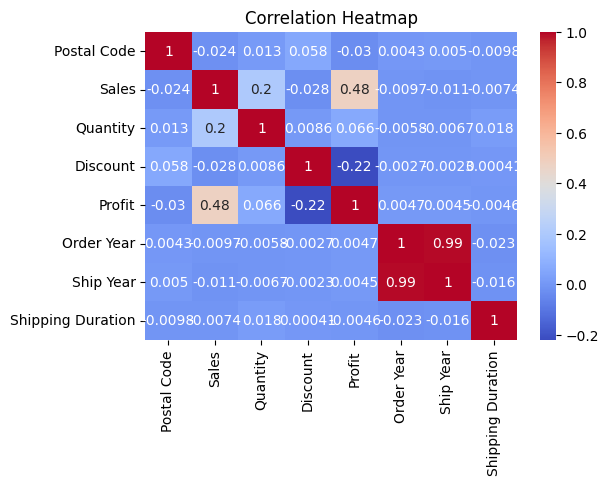

In [13]:
#Correlation heatmap between numerical variables
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot  = True , cmap = 'coolwarm')
plt.title("Correlation Heatmap")
plt.show()

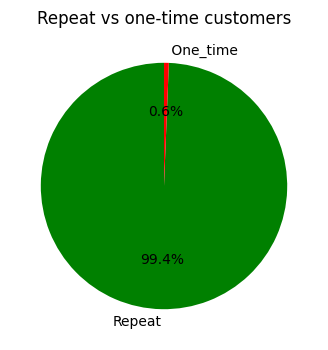

In [14]:
#Repeat vs one-time customers
customer_order = df['Customer ID'].value_counts()
one_time = (customer_order ==1).sum()
repeat = (customer_order >1).sum()

labels = ['Repeat' ,' One_time']
sizes = [repeat , one_time]
colors = ['green' ,'red']

plt.figure(figsize=(6,4))
plt.pie(sizes , labels = labels , autopct = '%0.1f%%',startangle =90,  colors = colors)
plt.title("Repeat vs one-time customers")
plt.show()

Top Customers :
     Customer ID  total_sales  total_orders  total_Profit     avg_sale
700    SM-20320    25043.050             5    -1980.7393  1669.536667
741    TC-20980    19052.218             5     8981.3239  1587.684833
621    RB-19360    15117.339             6     6976.0959   839.852167
730    TA-21385    14595.620             4     4703.7883  1459.562000
6      AB-10105    14473.571            10     5444.8055   723.678550
434    KL-16645    14175.229            12      806.8550   488.801000
669    SC-20095    14142.334             9     5757.4119   642.833364
327    HL-15040    12873.298             6     5622.4292  1170.299818
683    SE-20110    12209.438            11     2650.6769   642.602000
131    CC-12370    12129.072             5     2177.0493  1102.642909


/tmp/ipython-input-15-3284031824.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer ID' ,y='total_sales', data= top_customers , palette = 'viridis' )


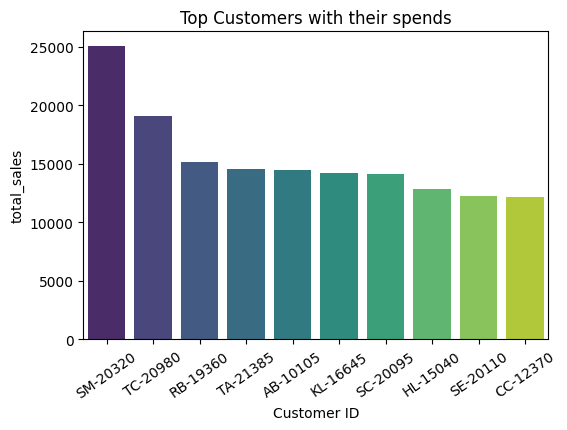

In [15]:
#Customer lifetime value analysis (group by Customer ID)
clv = df.groupby("Customer ID").agg(
    total_sales = ("Sales" ,'sum'),
    total_orders = ('Order ID','nunique'),
    total_Profit = ('Profit','sum'),
    avg_sale = ("Sales" , 'mean')
).reset_index()

clv = clv.sort_values(by='total_sales' ,ascending=False)
top_customers = clv.head(10)
print("Top Customers :\n",top_customers)

plt.figure(figsize=(6,4))
sns.barplot(x='Customer ID' ,y='total_sales', data= top_customers , palette = 'viridis' )
plt.title('Top Customers with their spends')
plt.xticks(rotation=35)
plt.show()

In [16]:
#Average shipping duration per customer or product

avg_ship_duration_customer = df.groupby('Customer ID')['Shipping Duration'].mean()
avg_ship_duration_customer = avg_ship_duration_customer.dt.days
print("Average shipping duration for Customer: \n", avg_ship_duration_customer.head())

avg_ship_duration_product = df.groupby('Product ID')['Shipping Duration'].mean().dt.days
print("\nAverage shipping duration of product : \n", avg_ship_duration_product.head())

pd.set_option('display.max_columns' ,None)
pd.set_option('display.max_rows' , None)


Average shipping duration for Customer: 
 Customer ID
AA-10315    4
AA-10375    3
AA-10480    5
AA-10645    3
AB-10015    2
Name: Shipping Duration, dtype: int64

Average shipping duration of product : 
 Product ID
FUR-BO-10000112    2
FUR-BO-10000330    1
FUR-BO-10000362    4
FUR-BO-10000468    3
FUR-BO-10000711    6
Name: Shipping Duration, dtype: int64


In [17]:
#Which customers drive the most profit?
df.groupby(['Customer ID' , 'Customer Name','Segment'])[['Profit' , 'Sales']].sum().sort_values(by = 'Profit' , ascending = False).head()

,,,Profit,Sales
Customer ID,Customer Name,Segment,,
TC-20980,Tamara Chand,Corporate,8981.3239,19052.218
RB-19360,Raymond Buch,Consumer,6976.0959,15117.339
SC-20095,Sanjit Chand,Consumer,5757.4119,14142.334
HL-15040,Hunter Lopez,Consumer,5622.4292,12873.298
AB-10105,Adrian Barton,Consumer,5444.8055,14473.571


In [18]:
#Product bundling potential — frequently bought together (optional via Market Basket Analysis)
basket = df.groupby(['Order ID','Product Name'])['Quantity'].sum().unstack().fillna(0)

basket = basket.applymap(lambda x: 1 if x >0 else 0)

freq_itemsets  = apriori(basket , min_support=0.2 , use_colnames = True)
if not freq_itemsets.empty :
  rules = association_rules(freq_itemsets , metric = 'lift' , min_threshold=1)
  rules.sort_values('confidence' ,ascending = False)
  print(rules[['antecedents' ,'consequents' ,'support','confidence','lift']].head())
else:
  print("No bundling items found in the data")

/tmp/ipython-input-18-3552271177.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x >0 else 0)


No bundling items found in the data


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [19]:
#Group by Customer ID → Total sales, profit, order count
customer_seg = df.groupby('Customer ID').agg(
    total_sales =('Sales' , 'sum'),
    profit = ('Profit','sum'),
    order_count = ('Order ID' , 'count')
).reset_index()
customer_seg.head()

,Customer ID,total_sales,profit,order_count
0,AA-10315,5563.560,-362.8825,11
1,AA-10375,1056.390,277.3824,15
2,AA-10480,1790.512,435.8274,12
3,AA-10645,5086.935,857.8033,18
4,AB-10015,886.156,129.3465,6


In [20]:
 #Normalize these features
cols = ['total_sales','profit','order_count']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_seg[cols])
scaled_df = pd.DataFrame(scaled_data , columns = ['scaled_sales','scaled_profit','scaled_order_count'])
customer_seg_scaled = pd.concat([customer_seg[['Customer ID']] , scaled_df  ], axis = 1)
customer_seg_scaled.head()

,Customer ID,scaled_sales,scaled_profit,scaled_order_count
0,AA-10315,1.015112,-0.810161,-0.256912
1,AA-10375,-0.700590,-0.093739,0.384256
2,AA-10480,-0.421139,0.083553,-0.096620
3,AA-10645,0.833680,0.555721,0.865131
4,AB-10015,-0.765391,-0.259383,-1.058371


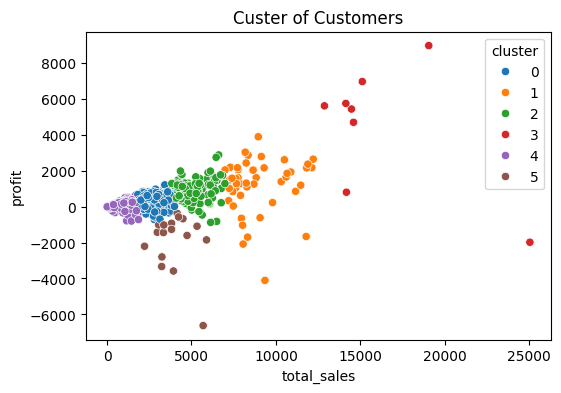

In [21]:
 #Apply KMeans clustering
kmeans = KMeans(n_clusters = 6 , random_state = 42)
customer_seg['cluster'] = kmeans.fit_predict(customer_seg[cols])
customer_seg[['Customer ID','cluster']].head()

#visulaize
plt.figure(figsize=(6,4))
sns.scatterplot(data = customer_seg , x = 'total_sales',  y = 'profit', hue='cluster' , palette='tab10')
plt.title("Custer of Customers")
plt.show()

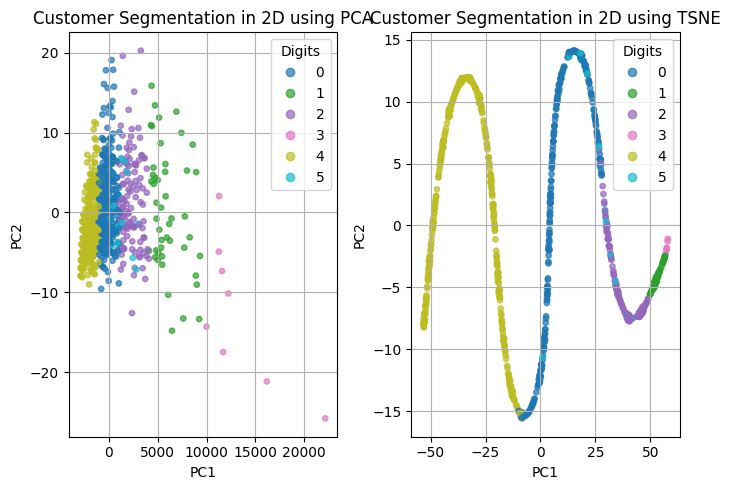

In [22]:
#Use PCA/t-SNE for visualizing customer clusters
X  = customer_seg[['total_sales','order_count']]
y = customer_seg['cluster']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

tsne = TSNE(n_components=2  , perplexity=30, random_state= 42)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(7,5))
plt.subplot(1,2,1)
scatter = plt.scatter(X_pca[:,0] ,X_pca[:,1] , c=y, cmap='tab10', alpha = 0.7 , s  =15)
plt.legend(*scatter.legend_elements(), title='Digits')
plt.title("Customer Segmentation in 2D using PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

plt.subplot(1,2,2)
scatter = plt.scatter(X_tsne[:,0] ,X_tsne[:,1] , c=y, cmap='tab10',alpha = 0.7 ,  s  =15)
plt.legend(*scatter.legend_elements(), title='Digits')
plt.title("Customer Segmentation in 2D using TSNE")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

plt.tight_layout()
plt.show()

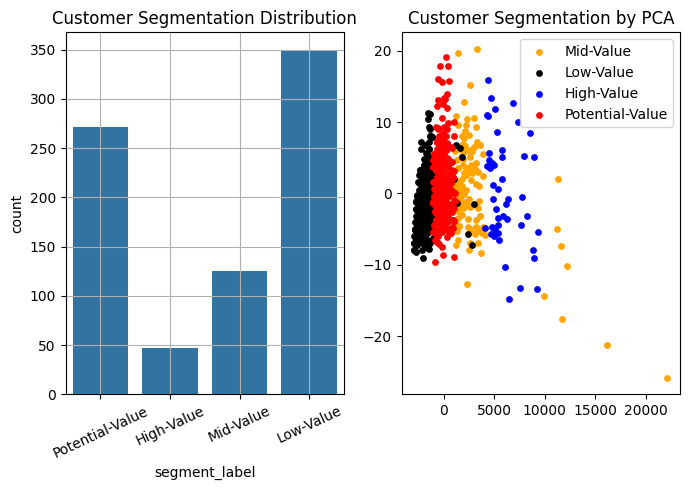

In [23]:
#Label customer segments: high-value, mid-value, low-value
cluster_seg = customer_seg.groupby('cluster')[['total_sales','profit','order_count']].mean().sort_values('total_sales',ascending =False)

cluster_label = {
    0 : 'Potential-Value',
    1 : 'High-Value',
    2 : 'Mid-Value' ,
    3 : 'Mid-Value' ,
    4 : 'Low-Value' ,
    5 : 'Low-Value'
}
customer_seg['segment_label'] = customer_seg['cluster'].map(cluster_label)
customer_seg.isnull().sum()

plt.figure(figsize=(7,5))

plt.subplot(1,2,1)
sns.countplot(data = customer_seg ,x ='segment_label' , order = ['Potential-Value','High-Value','Mid-Value' ,'Mid-Value' ,'Low-Value' ,'Low-Value'])
plt.title("Customer Segmentation Distribution")
plt.xticks(rotation=25)
plt.grid(True)

plt.subplot(1,2,2)
colors = {'Potential-Value' : 'Red' ,'High-Value': 'Blue' , 'Mid-Value':'orange', 'Low-Value' : 'black' }
for label in customer_seg['segment_label'].unique():
  indices = customer_seg['segment_label'] == label
  plt.scatter(X_pca[indices,0] , X_pca[indices,1],c = colors[label],label = label , s= 15)
plt.title("Customer Segmentation by PCA")
plt.legend()

plt.tight_layout()
plt.show()


In [24]:
features = ['Category', 'Sub-Category', 'Segment', 'Region', 'Quantity', 'Discount', 'Sales', 'Shipping Duration']
target = 'Profit'
model_df = df[features + [target]].copy()

model_df['Shipping Duration'] = model_df['Shipping Duration'].dt.days

model_df = pd.get_dummies(model_df , columns = ['Category','Sub-Category','Segment','Region'] , drop_first = True)

In [25]:
X = model_df.drop(columns=[target])
y = model_df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_train , X_test, y_train , y_test = train_test_split(X_scaled , y ,test_size = 0.2, random_state=42)

In [145]:
models = {
    'XG Boost' : XGBRegressor(n_estimators=100,learning_rate=0.1,random_state=42)
}

In [146]:
result = {}

for name ,model in models.items():
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  mae = mean_absolute_error(y_test,y_pred)
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  r2 = r2_score(y_test,y_pred)

  result[name] = {
      'MAE' : mae,
      'MSE' : mse,
      'RMSE' : rmse,
      'R2 SCORE' : r2
  }

result_df = pd.DataFrame(result).T.sort_values('R2 SCORE' ,ascending=False)
result_df

,MAE,MSE,RMSE,R2 SCORE
XG Boost,21.691387,8534.046313,92.379902,0.823986


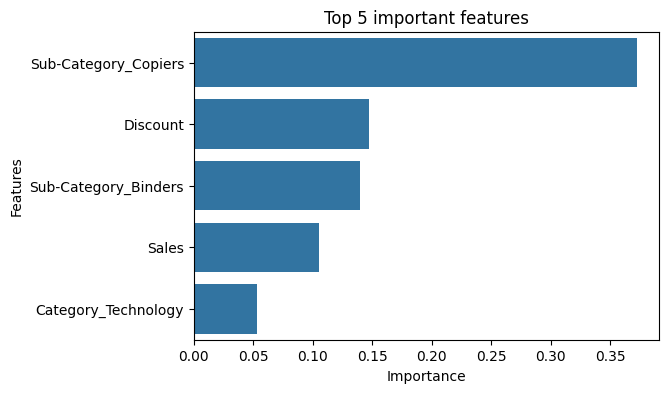

In [143]:
#Feature Importances
tree_model = models['XG Boost']
feature_names = X.columns

importances = tree_model.feature_importances_

feature_imp_df = pd.DataFrame({'Features':feature_names , 'Importance':importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance' ,ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x='Importance' , y = 'Features',data=feature_imp_df.head() )
plt.title("Top 5 important features")
plt.show()

In [127]:
#Define churned customers = no purchase in last X months
X_months = 6

#df['Order Date'] = pd.to_datetime(df['Order Date'])

last_purchase = df.groupby("Customer ID")['Order Date'].max().reset_index()
last_purchase.columns = ['Customer ID','Last Purchase Date']

max_date = df['Order Date'].max()
max_date

last_purchase['Months Since last purchase'] = ((max_date - last_purchase['Last Purchase Date'])/pd.Timedelta(days=30)).round()

last_purchase['Churned'] = last_purchase['Months Since last purchase']>X_months

churned_customers = last_purchase[last_purchase['Churned']]

print(f"Total churned customers (Since {X_months} months) : {len(churned_customers)}")
print('\n',churned_customers.head())

Total churned customers (Since 6 months) : 183

    Customer ID Last Purchase Date  Months Since last purchase  Churned
2     AA-10480         2017-04-15                         9.0     True
4     AB-10015         2016-11-10                        14.0     True
11    AC-10420         2017-05-12                         8.0     True
14    AC-10660         2017-03-23                         9.0     True
17    AF-10885         2016-11-10                        14.0     True


In [128]:
 #Create label: churned (1) or not (0)
 le = LabelEncoder()

 last_purchase['Churned'] = le.fit_transform(last_purchase['Churned'])
 last_purchase.head()

,Customer ID,Last Purchase Date,Months Since last purchase,Churned
0,AA-10315,2017-06-29,6.0,0
1,AA-10375,2017-12-11,1.0,0
2,AA-10480,2017-04-15,9.0,1
3,AA-10645,2017-11-05,2.0,0
4,AB-10015,2016-11-10,14.0,1


In [129]:
X_churn = last_purchase.drop(columns=['Customer ID','Last Purchase Date','Churned'])
y_churn = last_purchase['Churned']

X_churn_train, X_churn_test, y_churn_train, y_churn_test = train_test_split(X_churn , y_churn , test_size =0.2 , random_state = 42)

In [132]:
final_result = {}

req_models = {
    "Logistic Regression" : LogisticRegression(max_iter = 200,random_state=42),
    "Random Forest Classifier" : RandomForestClassifier(max_depth=5,random_state=42)
}

for name,model in req_models.items():
  model.fit(X_churn_train,y_churn_train)
  y_pred = model.predict(X_churn_test)

  cm = confusion_matrix(y_churn_test,y_pred)
  precision = precision_score(y_churn_test,y_pred)
  recall = recall_score(y_churn_test,y_pred)
  f1score = f1_score(y_churn_test,y_pred)
  accuracy = accuracy_score(y_churn_test ,y_pred)

  final_result[name] = {
      "Confusion Matrix" : cm,
      "Precision" : precision,
      "Recall" : recall,
      "f1 score" : f1score,
      "Accuracy" : accuracy

  }
final_result_df = pd.DataFrame(final_result).T
final_result_df


,Confusion Matrix,Precision,Recall,f1 score,Accuracy
Logistic Regression,"[[124, 0], [0, 35]]",1.0,1.0,1.0,1.0
Random Forest Classifier,"[[124, 0], [0, 35]]",1.0,1.0,1.0,1.0


In [139]:
subcat_group = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().reset_index()
fig = px.bar(subcat_group, x='Sub-Category', y=['Sales', 'Profit'], barmode='group',
             title='Sub-Category-wise Sales & Profit')
fig.show()

In [140]:
ship_counts = df['Ship Mode'].value_counts().reset_index()
ship_counts.columns = ['Ship Mode', 'Count']

fig = px.bar(ship_counts, x='Ship Mode', y='Count', title='Most Used Shipping Modes')
fig.show()

# Avg shipping duration
df['Shipping Duration (Days)'] = df['Shipping Duration'].dt.days
ship_duration = df.groupby('Ship Mode')['Shipping Duration (Days)'].mean().reset_index()

fig = px.bar(ship_duration, x='Ship Mode', y='Shipping Duration (Days)', title='Average Shipping Duration per Mode')
fig.show()


In [148]:
#Loss making products
loss_products = df[df['Profit'] < 0]
loss_group = loss_products.groupby('Product Name')['Profit'].sum().sort_values().head(10).reset_index()

fig = px.bar(loss_group, x='Product Name', y='Profit', title='Top 10 Loss-Making Products')
fig.show()
